In [1]:
import requests
import time
import pandas as pd
import regex as re

In [2]:
df=pd.read_csv("all_articles_final.csv")

In [3]:
df.tail()

,author,content,description,keyword,publishedAt,source,title,url,urlToImage
3484,Cass Anderson,There’s no better color combination on this pl...,"This collection of the best red, white, and bl...",tornado,2019-07-23T19:23:36Z,NaN,"10 Red, White, And Blue Everyday Carry Essentials",https://brobible.com/gear/article/everyday-car...,https://brobible.files.wordpress.com/2019/07/e...
3485,PZ Myers,"I’m back! I have to say that, after drinking m...","I’m back! I have to say that, after drinking m...",tornado,2019-07-19T23:25:04Z,NaN,Home again from Duluth,https://freethoughtblogs.com/pharyngula/2019/0...,https://freethoughtblogs.com/pharyngula/wp-con...
3486,The Associated Press,The Latest on the effects of the remnants of H...,Officials say a suspected tornado has moved th...,tornado,2019-07-16T19:56:42Z,the-new-york-times,The Latest: Suspected tornado part of Barry's ...,https://abcnews.go.com/US/wireStory/latest-sus...,https://s.abcnews.com/images/US/WireAP_5c8ea4a...
3487,Zoë Jackson,Though stormy weather forecast for the Twin Ci...,Stormy weather forecast for the Twin Cities me...,tornado,2019-07-18T02:16:05Z,the-new-york-times,Tornadoes touch down in northern Minnesota,http://www.startribune.com/tornadoes-touch-dow...,http://stmedia.stimg.co/1aduluthtorn071819.PNG...
3488,NaN,About The Independent commenting\r\nIndependen...,NaN,tornado,2019-07-19T19:28:31Z,reuters,'Tornado' near Manchester damages cars and roofs,https://www.independent.co.uk/news/uk/home-new...,https://static.independent.co.uk/s3fs-public/t...


# Data Cleaning

In [4]:
df = df.drop_duplicates()

In [5]:
df.isnull().sum()

author          464
content         240
description      16
keyword           0
publishedAt       0
source         1045
title             3
url               0
urlToImage      231
dtype: int64

In [6]:
df = df.fillna(' ')

In [7]:
df.isnull().sum()

author         0
content        0
description    0
keyword        0
publishedAt    0
source         0
title          0
url            0
urlToImage     0
dtype: int64

In [8]:
df_clean=df[["description","title",'content',"url"]]

In [9]:
def source_extractor(url):
    x = re.findall("https://www.[\S]+.com|https://[\S]+.com", url)

df_clean['source'] = df_clean['url'].apply(source_extractor)

/Users/mariellemarcus/Desktop/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
df_clean.shape

(3489, 5)

In [11]:
df_clean.head()

,description,title,content,url,source
0,"It’s hurricane season, and we’ve got a weirdo ...",Never Try To Drive Through a Flood,"Its hurricane season, and weve got a weirdo st...",https://lifehacker.com/never-try-to-drive-thro...,None
1,Tropical Storm Barry still doesn’t formally ex...,New Orleans Faces a Major Flood Threat [Updating],Tropical Storm Barry still doesnt formally exi...,https://earther.gizmodo.com/new-orleans-faces-...,None
2,A flash flood emergency in Washington left roa...,Torrential rain floods Washington area,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/us/2019/07/08/dc-me...,None
3,As tropical storm Barry nears the coast of Lou...,Nearly 5 million people under flash flood watch,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None
4,Golden Meadow Police released this video showi...,Watch: Louisiana road ends abruptly as flood w...,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None


In [12]:
df_clean.isnull().sum()

description       0
title             0
content           0
url               0
source         3489
dtype: int64

In [13]:
df_clean["text"] = df_clean[["title", "description", 'content']].apply(lambda x: ' '.join(x), axis=1)

/Users/mariellemarcus/Desktop/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_clean.head()

,description,title,content,url,source,text
0,"It’s hurricane season, and we’ve got a weirdo ...",Never Try To Drive Through a Flood,"Its hurricane season, and weve got a weirdo st...",https://lifehacker.com/never-try-to-drive-thro...,None,Never Try To Drive Through a Flood It’s hurric...
1,Tropical Storm Barry still doesn’t formally ex...,New Orleans Faces a Major Flood Threat [Updating],Tropical Storm Barry still doesnt formally exi...,https://earther.gizmodo.com/new-orleans-faces-...,None,New Orleans Faces a Major Flood Threat [Updati...
2,A flash flood emergency in Washington left roa...,Torrential rain floods Washington area,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/us/2019/07/08/dc-me...,None,Torrential rain floods Washington area A flash...
3,As tropical storm Barry nears the coast of Lou...,Nearly 5 million people under flash flood watch,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Nearly 5 million people under flash flood watc...
4,Golden Meadow Police released this video showi...,Watch: Louisiana road ends abruptly as flood w...,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Watch: Louisiana road ends abruptly as flood w...


In [16]:
df_clean.head()

,description,title,content,url,source,text
0,"It’s hurricane season, and we’ve got a weirdo ...",Never Try To Drive Through a Flood,"Its hurricane season, and weve got a weirdo st...",https://lifehacker.com/never-try-to-drive-thro...,None,Never Try To Drive Through a Flood It’s hurric...
1,Tropical Storm Barry still doesn’t formally ex...,New Orleans Faces a Major Flood Threat [Updating],Tropical Storm Barry still doesnt formally exi...,https://earther.gizmodo.com/new-orleans-faces-...,None,New Orleans Faces a Major Flood Threat [Updati...
2,A flash flood emergency in Washington left roa...,Torrential rain floods Washington area,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/us/2019/07/08/dc-me...,None,Torrential rain floods Washington area A flash...
3,As tropical storm Barry nears the coast of Lou...,Nearly 5 million people under flash flood watch,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Nearly 5 million people under flash flood watc...
4,Golden Meadow Police released this video showi...,Watch: Louisiana road ends abruptly as flood w...,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Watch: Louisiana road ends abruptly as flood w...


In [17]:
df_clean = df_clean.drop_duplicates()

# NLP for Recommender System

In [18]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()

df_clean['text_token']=df_clean['text'].apply(lambda x : filter(None,x.split(" ")))
df_clean['text_stemmed']=df_clean['text_token'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
df_clean['text_stemmed_sentence']=df_clean['text_stemmed'].apply(lambda x : " ".join(x))

In [19]:
df_clean.shape

(3120, 9)

In [20]:
df_clean['text_stemmed_sentence'].head()

0    never tri To drive through a flood it’ hurrica...
1    new orlean face a major flood threat [updating...
2    torrenti rain flood washington area A flash fl...
3    nearli 5 million peopl under flash flood watch...
4    watch: louisiana road end abruptli as flood wa...
Name: text_stemmed_sentence, dtype: object

In [21]:
from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

In [22]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
tvec = TfidfVectorizer(lowercase=True,
                       stop_words="english",
                       max_df=.95, # Ignore words that occur in > 98% of the documents from the corpus
                       min_df=10,# A word must occur in at least two documents from the corpus
                       max_features=1000, # Only the top 1,000 words from the entire corpus will be saved
                       vocabulary=None,
                       binary=False,
                       ngram_range=(1, 2))# Captures every single word and every 2-gram

In [24]:
tfidf_matrix = tvec.fit_transform(df_clean['text_stemmed_sentence'])

In [25]:
tfidf_matrix.shape

(3120, 1000)

In [26]:
from sklearn.metrics.pairwise import linear_kernel

In [27]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
indices = pd.Series(df_clean.index, index=df_clean['title']).drop_duplicates()

In [29]:
df_clean.head()

,description,title,content,url,source,text,text_token,text_stemmed,text_stemmed_sentence
0,"It’s hurricane season, and we’ve got a weirdo ...",Never Try To Drive Through a Flood,"Its hurricane season, and weve got a weirdo st...",https://lifehacker.com/never-try-to-drive-thro...,None,Never Try To Drive Through a Flood It’s hurric...,<filter object at 0x11967f048>,"[never, tri, To, drive, through, a, flood, it’...",never tri To drive through a flood it’ hurrica...
1,Tropical Storm Barry still doesn’t formally ex...,New Orleans Faces a Major Flood Threat [Updating],Tropical Storm Barry still doesnt formally exi...,https://earther.gizmodo.com/new-orleans-faces-...,None,New Orleans Faces a Major Flood Threat [Updati...,<filter object at 0x11967e358>,"[new, orlean, face, a, major, flood, threat, [...",new orlean face a major flood threat [updating...
2,A flash flood emergency in Washington left roa...,Torrential rain floods Washington area,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/us/2019/07/08/dc-me...,None,Torrential rain floods Washington area A flash...,<filter object at 0x11967ea20>,"[torrenti, rain, flood, washington, area, A, f...",torrenti rain flood washington area A flash fl...
3,As tropical storm Barry nears the coast of Lou...,Nearly 5 million people under flash flood watch,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Nearly 5 million people under flash flood watc...,<filter object at 0x1a1e902390>,"[nearli, 5, million, peopl, under, flash, floo...",nearli 5 million peopl under flash flood watch...
4,Golden Meadow Police released this video showi...,Watch: Louisiana road ends abruptly as flood w...,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Watch: Louisiana road ends abruptly as flood w...,<filter object at 0x1a1e902be0>,"[watch:, louisiana, road, end, abruptli, as, f...",watch: louisiana road end abruptli as flood wa...


In [30]:
df_clean.shape

(3120, 9)

In [31]:
# Code modified from code provided by DataCamp.com:
#https://www.datacamp.com/community/tutorials/recommender-systems-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264371&utm_targetid=aud-522010995285:dsa-473406569915&utm_loc_interest_ms=&utm_loc_physical_ms=1018127&gclid=Cj0KCQjwyerpBRD9ARIsAH-ITn_LfMdHbYHake9SSueRPugpfzvuslA8sGTEwpScrvWdQ3hFQYFF1iEaAun-EALw_wcB


# Function that takes in article title as input and outputs most similar articles
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the articles based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar articles
    sim_scores = sim_scores[1:11]

    # Get the article indices
    title_indices = [i[0] for i in sim_scores]
    
    news_score = []
    for item in sim_scores:
        if item[1] > .4:
            news_score.append((df_clean['title'].iloc[item[0]] , item[1], df_clean['url'].iloc[item[0]]))
            
    results = pd.DataFrame(news_score)
    results= results.rename(columns={0:'Article Title' , 1:'Similarity Score', 2: 'Article URL'})
    
    # Return the top 10 most similar articles
#     return df_clean['title'].iloc[title_indices] , sim_scores
    return results

In [32]:
df_clean.head()

,description,title,content,url,source,text,text_token,text_stemmed,text_stemmed_sentence
0,"It’s hurricane season, and we’ve got a weirdo ...",Never Try To Drive Through a Flood,"Its hurricane season, and weve got a weirdo st...",https://lifehacker.com/never-try-to-drive-thro...,None,Never Try To Drive Through a Flood It’s hurric...,<filter object at 0x11967f048>,"[never, tri, To, drive, through, a, flood, it’...",never tri To drive through a flood it’ hurrica...
1,Tropical Storm Barry still doesn’t formally ex...,New Orleans Faces a Major Flood Threat [Updating],Tropical Storm Barry still doesnt formally exi...,https://earther.gizmodo.com/new-orleans-faces-...,None,New Orleans Faces a Major Flood Threat [Updati...,<filter object at 0x11967e358>,"[new, orlean, face, a, major, flood, threat, [...",new orlean face a major flood threat [updating...
2,A flash flood emergency in Washington left roa...,Torrential rain floods Washington area,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/us/2019/07/08/dc-me...,None,Torrential rain floods Washington area A flash...,<filter object at 0x11967ea20>,"[torrenti, rain, flood, washington, area, A, f...",torrenti rain flood washington area A flash fl...
3,As tropical storm Barry nears the coast of Lou...,Nearly 5 million people under flash flood watch,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Nearly 5 million people under flash flood watc...,<filter object at 0x1a1e902390>,"[nearli, 5, million, peopl, under, flash, floo...",nearli 5 million peopl under flash flood watch...
4,Golden Meadow Police released this video showi...,Watch: Louisiana road ends abruptly as flood w...,Chat with us in Facebook Messenger. Find out w...,https://www.cnn.com/videos/weather/2019/07/13/...,None,Watch: Louisiana road ends abruptly as flood w...,<filter object at 0x1a1e902be0>,"[watch:, louisiana, road, end, abruptli, as, f...",watch: louisiana road end abruptli as flood wa...


# Recommender System Examples

In [94]:
q="floods"
p="Washington"

pd.set_option('display.max_colwidth',1000)
df_clean.loc[(df_clean["title"].str.contains(q)&df_clean["title"].str.contains(p)), "title"]

2                   Torrential rain floods Washington area
82    PHOTOS: Dangerous flash floods soak Washington, D.C.
Name: title, dtype: object

In [95]:
get_recommendations('Torrential rain floods Washington area')

,Article Title,Similarity Score,Article URL
0,"PHOTOS: Dangerous flash floods soak Washington, D.C.",0.622848,https://news.yahoo.com/photos-dangerous-flash-floods-soak-washington-dc-170414524.html
1,"Thunderstorms in Washington DC have caused flooding in the White House, road washouts, and indoor waterfalls",0.501093,https://www.insider.com/flooding-in-washington-dc-caused-road-washouts-and-indoor-waterfalls-2019-7
2,Flooding reported on several roadways amid torrential downpour - CP24 Toronto's Breaking News,0.478079,https://www.cp24.com/firefighters-responded-to-12-water-rescue-calls-amid-torrential-downpour-1.4511514
3,Flash-Flood Watch Threatens Washington's July 4 Celebrations,0.415850,https://www.bloomberg.com/news/articles/2019-07-04/washington-at-risk-of-flash-flooding-as-alert-issued-for-july-4
4,Nearly 5 million people under flash flood watch,0.401775,https://www.cnn.com/videos/weather/2019/07/13/barry-louisiana-new-orleans-weather-saturday-vpx.cnn


In [96]:
get_recommendations('Rains strand Washington drivers, flood White House basement')

,Article Title,Similarity Score,Article URL
0,"Thanks to a Heavy Rainstorm in D.C., the White House’s Basement is Flooded",0.844942,https://time.com/5622068/rainstorm-washington-floods-white-house/
1,"Thunderstorms in Washington DC have caused flooding in the White House, road washouts, and indoor waterfalls",0.475447,https://www.insider.com/flooding-in-washington-dc-caused-road-washouts-and-indoor-waterfalls-2019-7
2,Life-threatening rains pound U.S. capital; White House basement offices leak,0.429613,https://news.yahoo.com/life-threatening-rains-pound-u-171957175.html


In [97]:
df_clean[df_clean['source'].isnull()== True]

,description,title,content,url,source,text,text_token,text_stemmed,text_stemmed_sentence


In [98]:
top_sources = ['https://news.yahoo.com', 
               'https://www.nytimes.com', 
               'https://www.usatoday.com', 
               'https://www.cnn.com', 
               'https://abcnews.go.com']


In [99]:
new_df = pd.DataFrame()
for site in top_sources:
    new_df = pd.concat([new_df,df_clean[(df_clean['url'].isnull() == False) & (df_clean['url'].str.contains(site))]])
                 

In [100]:
new_df

,description,title,content,url,source,text,text_token,text_stemmed,text_stemmed_sentence
50,"Hurricane Barry made landfall Saturday morning in Louisiana. It has since weakened back to a tropical storm, but heavy rains will continue.",Louisiana officials warn of snakes and other creatures fighting to escape Hurricane Barry floodwaters,"snake flood louisiana\r\nGerald Herbert/AP\r\n<ul><li>First responders in St. Tammany Parish, Louisiana posted a warning on Saturday for areas with Hurricane Barry flooding.\r\n</li><li>""If the area you live in has high water, watch out for snakes and other critter… [+2428 chars]",https://news.yahoo.com/louisiana-officials-warn-snakes-other-140832157.html,https://news.yah,"Louisiana officials warn of snakes and other creatures fighting to escape Hurricane Barry floodwaters Hurricane Barry made landfall Saturday morning in Louisiana. It has since weakened back to a tropical storm, but heavy rains will continue. snake flood louisiana\r\nGerald Herbert/AP\r\n<ul><li>First responders in St. Tammany Parish, Louisiana posted a warning on Saturday for areas with Hurricane Barry flooding.\r\n</li><li>""If the area you live in has high water, watch out for snakes and other critter… [+2428 chars]",<filter object at 0x1a1e93d198>,"[louisiana, offici, warn, of, snake, and, other, creatur, fight, to, escap, hurrican, barri, floodwat, hurrican, barri, made, landfal, saturday, morn, in, louisiana., It, ha, sinc, weaken, back, to, a, tropic, storm,, but, heavi, rain, will, continue., snake, flood, louisiana\r\ngerald, herbert/ap\r\n<ul><li>first, respond, in, st., tammani, parish,, louisiana, post, a, warn, on, saturday, for, area, with, hurrican, barri, flooding.\r\n</li><li>""if, the, area, you, live, in, ha, high, water,, watch, out, for, snake, and, other, critter…, [+2428, chars]]","louisiana offici warn of snake and other creatur fight to escap hurrican barri floodwat hurrican barri made landfal saturday morn in louisiana. It ha sinc weaken back to a tropic storm, but heavi rain will continue. snake flood louisiana\r\ngerald herbert/ap\r\n<ul><li>first respond in st. tammani parish, louisiana post a warn on saturday for area with hurrican barri flooding.\r\n</li><li>""if the area you live in ha high water, watch out for snake and other critter… [+2428 chars]"
64,"The US city of New Orleans was under a storm-surge watch Wednesday along with a stretch of Louisiana coast as a tropical storm formed in the Gulf of Mexico, threatening the region with potentially life-threatening rains. ""Conditions appear favorable for this …",New Orleans threatened by floods as big storm forms,"Washington (AFP) - The US city of New Orleans was under a storm-surge watch Wednesday along with a stretch of Louisiana coast as a tropical storm formed in the Gulf of Mexico, threatening the region with potentially life-threatening rains.\r\nThe storm-surge wa… [+1841 chars]",https://news.yahoo.com/orleans-threatened-floods-big-storm-forms-193128545.html,https://news.yah,"New Orleans threatened by floods as big storm forms The US city of New Orleans was under a storm-surge watch Wednesday along with a stretch of Louisiana coast as a tropical storm formed in the Gulf of Mexico, threatening the region with potentially life-threatening rains. ""Conditions appear favorable for this … Washington (AFP) - The US city of New Orleans was under a storm-surge watch Wednesday along with a stretch of Louisiana coast as a tropical storm formed in the Gulf of Mexico, threatening the region with potentially life-threatening rains.\r\nThe storm-surge wa… [+1841 chars]",<filter object at 0x1a1e94d908>,"[new, orlean, threaten, by, flood, as, big, storm, form, the, US, citi, of, new, orlean, wa, under, a, storm-surg, watch, wednesday, along, with, a, stretch, of, louisiana, coast, as, a, tropic, storm, form, in, the, gulf, of, mexico,, threaten, the, region, with, potenti, life-threaten, rains., ""condit, appear, favor, for, thi, …, washington, (afp), -, 

In [101]:
def url_extractor(url):
    ind = url.index('.com')
    return url[0:(ind + 4)]

In [102]:
url_extractor('https://news.yahoo.com/orleans-threatened-floods-big-storm-forms-193128545.html')

'https://news.yahoo.com'

In [103]:
new_df['source'] = new_df['url'].apply(url_extractor)

In [104]:
new_df['source'].unique()

array(['https://news.yahoo.com', 'https://www.nytimes.com',
       'https://www.usatoday.com', 'https://www.cnn.com',
       'https://abcnews.go.com'], dtype=object)

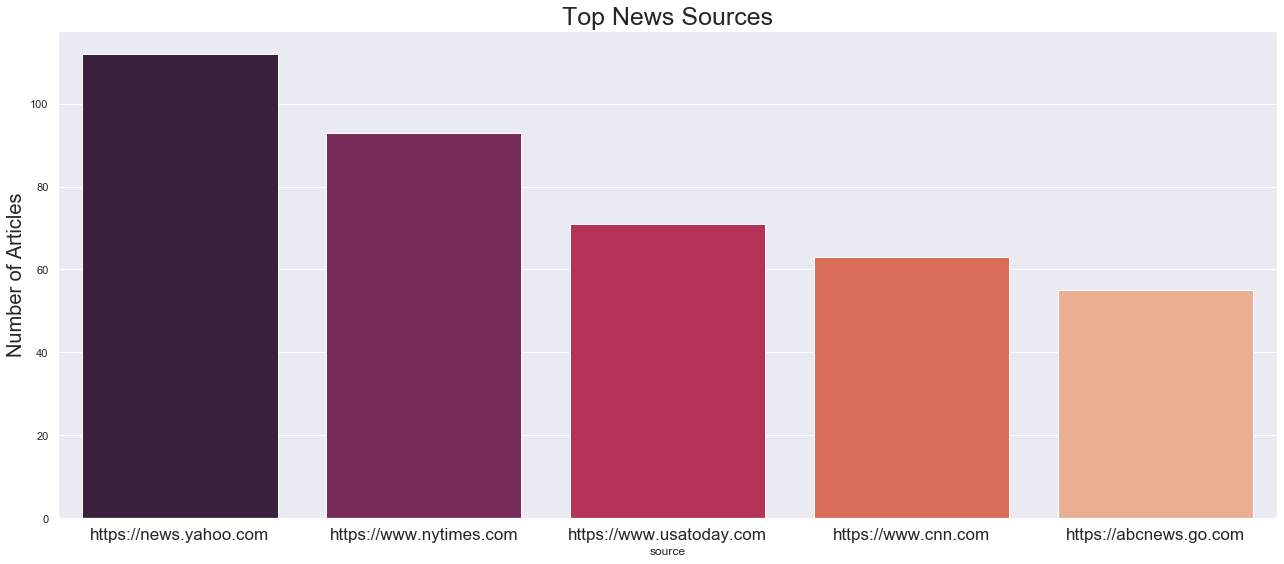

In [105]:
import seaborn as sns

plt.figure(figsize=(18,8))
plt.title('Top News Sources', size = 25)
plt.xlabel('News Source')
sns.set(style="darkgrid")
ax = sns.countplot(x="source", data=new_df, palette = 'rocket')
ax.set_xticklabels(ax.get_xticklabels(), size = 17)

# for p in ax.patches:
#     ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1), size = 20)

ax.set_ylabel('Number of Articles', size = 20) 

plt.tight_layout()
plt.show()

In [106]:
# !pip install wordcloud

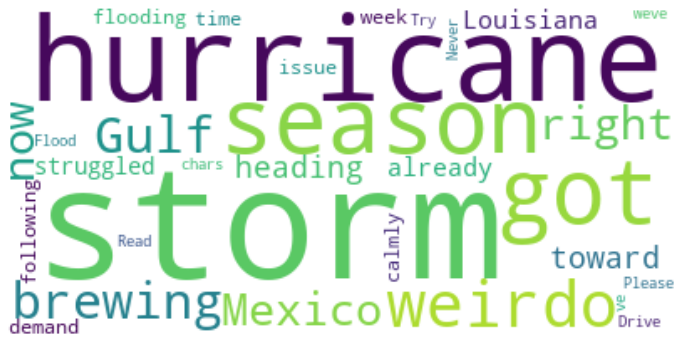

In [107]:
# Code modified from code provided by DataCamp: https://www.datacamp.com/community/tutorials/wordcloud-python
    
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.figure(figsize=(12,8))

# Start with one review:
text = df_clean['text'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()